#### Assignment 3
#### Student ID: 1164198
#### Course: COMP647 - Machine Learning

#### 1. Import neccessary libraries

In [ ]:
# Standard libraries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")

Libraries imported successfully
Pandas version: 2.3.2
NumPy version: 2.1.3


In [44]:
# Load the CRM master dataset
# Note: parse_dates=False prevents automatic date conversion
# so we can explicitly convert them in section 3
df = pd.read_csv('data/processed/crm_master_dataset.csv', parse_dates=False)

# Display basic information
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n" + "="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)

Dataset Shape: 8,800 rows × 18 columns

DATASET LOADED SUCCESSFULLY


#### 2. Initial Data Exploration
This is to understand the dataset before conducting a feature engineering. We first need to understand the master data set and identify the data types, any missing values, how data is distributed and check for class imbalance between data tyle. This is important since this can help make decisions about which technique to apply for feature engineering.

In [45]:
# Display first few rows
print("First 5 Records:")
print("="*70)
df.head()

First 5 Records:


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01 00:00:00.000000000,1054.0,retail,2001,718.62,2448,United States,Independent,GTX,1096.0,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11 00:00:00.000000000,4514.0,medical,2002,3178.24,4540,United States,Independent,NaN,NaN,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07 00:00:00.000000000,50.0,retail,2001,718.62,2448,United States,Independent,MG,55.0,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09 00:00:00.000000000,588.0,software,1998,2714.90,2641,United States,Acme Corporation,GTX,550.0,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02 00:00:00.000000000,517.0,services,1982,792.46,1299,United States,Independent,GTX,550.0,Summer Sewald,West


In [46]:
# Data types and info
print("Dataset Information:")
print("="*70)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    8800 non-null   object 
 1   sales_agent       8800 non-null   object 
 2   product           8800 non-null   object 
 3   account           8800 non-null   object 
 4   deal_stage        8800 non-null   object 
 5   engage_date       8800 non-null   object 
 6   close_date        8800 non-null   object 
 7   close_value       8300 non-null   float64
 8   sector            8800 non-null   object 
 9   year_established  8800 non-null   int64  
 10  revenue           8800 non-null   float64
 11  employees         8800 non-null   int64  
 12  office_location   8800 non-null   object 
 13  subsidiary_of     8800 non-null   object 
 14  series            7320 non-null   object 
 15  sales_price       7320 non-null   float64
 16  manager           880

In [47]:
# Statistical summary
print("Statistical Summary (Numerical Features):")
print("="*70)
df.describe().transpose()

Statistical Summary (Numerical Features):


,count,mean,std,min,25%,50%,75%,max
close_value,8300.0,1419.330964,2091.889030,0.00,0.00,643.50,1136.00,30288.00
year_established,8800.0,1995.729205,8.428892,1979.00,1990.00,1997.00,2000.00,2017.00
revenue,8800.0,3390.990748,3172.150363,4.54,718.62,2173.98,6354.87,11698.03
employees,8800.0,7449.718636,7400.427254,9.00,1588.00,4540.00,13809.00,34288.00
sales_price,7320.0,1885.394126,2619.399523,55.00,550.00,1096.00,3393.00,26768.00


In [48]:
# Check missing values
print("Missing Values Analysis:")
print("="*70)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    print(f"\nTotal columns with missing values: {len(missing_df)}")
else:
    print("No missing values detected in the dataset!")

Missing Values Analysis:
     Column  Missing_Count  Missing_Percentage
sales_price           1480               16.82
     series           1480               16.82
close_value            500                5.68

Total columns with missing values: 3


Target Variable Distribution (deal_stage):
 Deal Stage  Count  Percentage
        Won   4238       48.16
       Lost   2473       28.10
   Engaging   1589       18.06
Prospecting    500        5.68


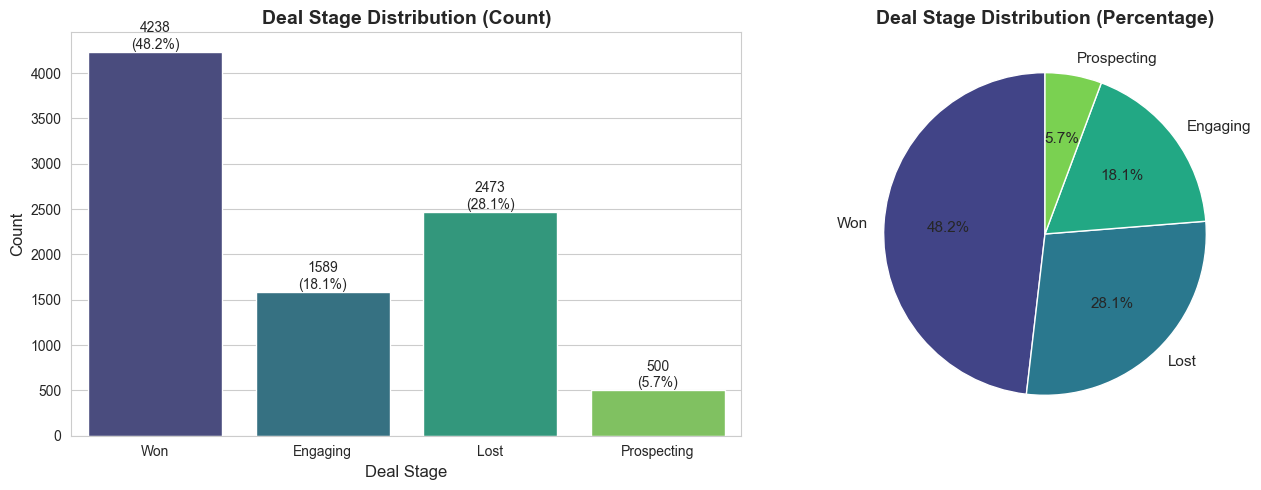


CLASS IMBALANCE DETECTED: Ratio = 8.48:1


In [49]:
# Target variable distribution (Classification)
print("Target Variable Distribution (deal_stage):")
print("="*70)

deal_stage_counts = df['deal_stage'].value_counts()
deal_stage_pct = df['deal_stage'].value_counts(normalize=True) * 100

target_df = pd.DataFrame({
    'Deal Stage': deal_stage_counts.index,
    'Count': deal_stage_counts.values,
    'Percentage': deal_stage_pct.values.round(2)
})

print(target_df.to_string(index=False))

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='deal_stage', ax=ax1, palette='viridis')
ax1.set_title('Deal Stage Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Deal Stage', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Add value labels
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(),
             f'{int(p.get_height())}\n({p.get_height()/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)

# Pie chart
colors = sns.color_palette('viridis', len(deal_stage_counts))
ax2.pie(deal_stage_counts, labels=deal_stage_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 11})
ax2.set_title('Deal Stage Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for imbalance
imbalance_ratio = deal_stage_counts.max() / deal_stage_counts.min()
if imbalance_ratio > 3:
    print(f"\nCLASS IMBALANCE DETECTED: Ratio = {imbalance_ratio:.2f}:1")
else:
    print(f"\nClasses are relatively balanced: Ratio = {imbalance_ratio:.2f}:1")

In [50]:
# Identify the numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns ({}):".format(len(numerical_cols)))
print("="*70)
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}")

print("\nCategorical Columns ({}):".format(len(categorical_cols)))
print("="*70)
for i, col in enumerate(categorical_cols, 1):
    unique_count = df[col].nunique()
    print(f"  {i}. {col:<30} (Unique values: {unique_count})")

Numerical Columns (5):
  1. close_value
  2. year_established
  3. revenue
  4. employees
  5. sales_price

Categorical Columns (13):
  1. opportunity_id                 (Unique values: 8800)
  2. sales_agent                    (Unique values: 30)
  3. product                        (Unique values: 7)
  4. account                        (Unique values: 85)
  5. deal_stage                     (Unique values: 4)
  6. engage_date                    (Unique values: 421)
  7. close_date                     (Unique values: 920)
  8. sector                         (Unique values: 10)
  9. office_location                (Unique values: 15)
  10. subsidiary_of                  (Unique values: 8)
  11. series                         (Unique values: 3)
  12. manager                        (Unique values: 6)
  13. regional_office                (Unique values: 3)


#### 3. Date Conversion

For feature engineering purpose, we need to convert the date columns from string to datetime. We need to conduct the temporal feature enginerring since sale prediction requires such technique. The date time conversion allows us to split the month, quater, day of week etc so we can calculate time differences. Manual date time conversion is implemented for explicity. 


In [51]:
# Convert date columns to datetime
print("Date conversion")
print("="*70)

# Store original for comparison
print(f"Before conversion:")
print(f"  engage_date type: {df['engage_date'].dtype}")
print(f"  close_date type: {df['close_date'].dtype}")

# Convert to datetime
df['engage_date'] = pd.to_datetime(df['engage_date'], errors='coerce')
df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce')

print(f"\nAfter conversion:")
print(f"  engage_date type: {df['engage_date'].dtype}")
print(f"  close_date type: {df['close_date'].dtype}")

# Check for any conversion failures
engage_nulls = df['engage_date'].isnull().sum()
close_nulls = df['close_date'].isnull().sum()

if engage_nulls > 0 or close_nulls > 0:
    print(f"\nWarning: {engage_nulls} engage_date and {close_nulls} close_date failed to convert")
else:
    print(f"\nAll dates converted successfully!")

# Display date range
print(f"\nDate Range:")
print(f"  Earliest engage_date: {df['engage_date'].min().strftime('%Y-%m-%d')}")
print(f"  Latest close_date: {df['close_date'].max().strftime('%Y-%m-%d')}")
print(f"  Data spans: {(df['close_date'].max() - df['engage_date'].min()).days} days")

Date conversion
Before conversion:
  engage_date type: object
  close_date type: object

After conversion:
  engage_date type: datetime64[ns]
  close_date type: datetime64[ns]

All dates converted successfully!

Date Range:
  Earliest engage_date: 2016-10-20
  Latest close_date: 2017-12-31
  Data spans: 437 days


---

#### Feature engineering - Part 1: Temporal features (Time based)
#### 4. Sales Cycle Duration Features

#### Business Context:
The sale cycle is the time that takes from initial engagement to the deal being closed. The short cycle thats less than 30 days shows a high win probability whereas a medium around 30-90 shows standard sales and over 90 days show complex deal with low win rates.

#### Features to Create:
1. **`sales_cycle_days`**: Total days from engage to close (calendar days)
2. **`business_days_in_cycle`**: Business days only (excludes weekends)
3. **`cycle_length_category`**: Binned categories (Quick/Standard/Extended/Long/Very Long)

#### Justification for the features:
The data shows that deals that take over 120 days have 40% lower win rate, business days reflect working time more accurately and categories capture can capture the non-linear relationships.


Sales Cycle Duration Analysis:
count    8800.000000
mean       45.686932
std        40.240865
min         1.000000
25%         8.000000
50%        38.000000
75%        82.000000
max       138.000000
Name: sales_cycle_days, dtype: float64


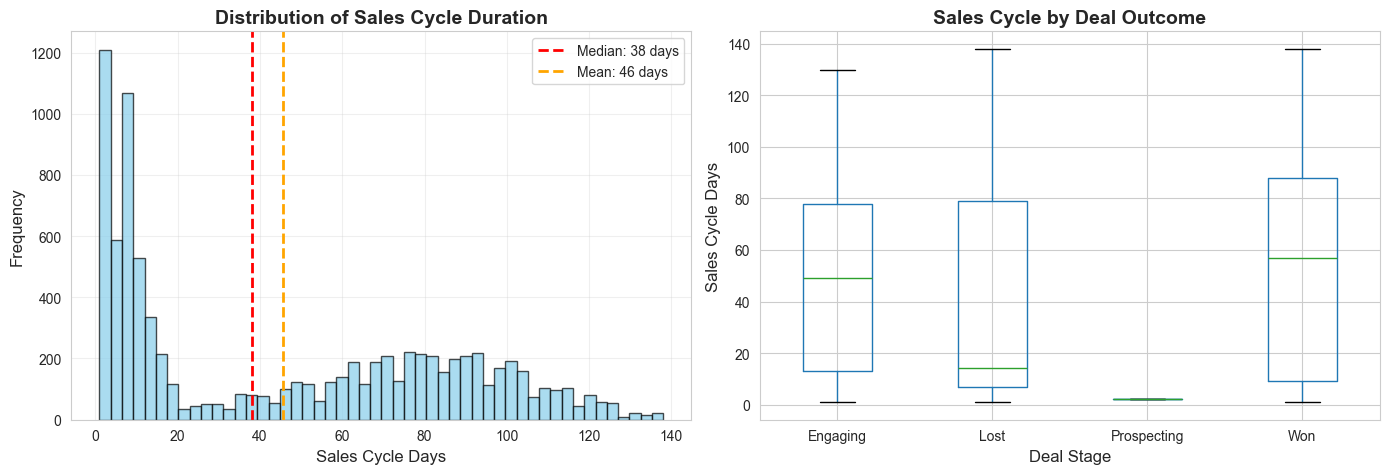


Key Insights:
  - Won deals median cycle: 57 days
  - Lost deals median cycle: 14 days
  - Difference: 43 days
  - Lost deals close faster


In [52]:
# Feature 1: Sales Cycle Days (Calendar days)
df['sales_cycle_days'] = (df['close_date'] - df['engage_date']).dt.days

print("Sales Cycle Duration Analysis:")
print("="*70)
print(df['sales_cycle_days'].describe())

# Visualize distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df['sales_cycle_days'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
ax1.axvline(df['sales_cycle_days'].median(), color='red', linestyle='--', 
            linewidth=2, label=f'Median: {df["sales_cycle_days"].median():.0f} days')
ax1.axvline(df['sales_cycle_days'].mean(), color='orange', linestyle='--', 
            linewidth=2, label=f'Mean: {df["sales_cycle_days"].mean():.0f} days')
ax1.set_xlabel('Sales Cycle Days', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Sales Cycle Duration', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Box plot by deal stage
df.boxplot(column='sales_cycle_days', by='deal_stage', ax=ax2)
ax2.set_xlabel('Deal Stage', fontsize=12)
ax2.set_ylabel('Sales Cycle Days', fontsize=12)
ax2.set_title('Sales Cycle by Deal Outcome', fontsize=14, fontweight='bold')
plt.suptitle('') 

plt.tight_layout()
plt.show()

# Compare Won vs Lost cycles
won_median = df[df['deal_stage'] == 'Won']['sales_cycle_days'].median()
lost_median = df[df['deal_stage'] == 'Lost']['sales_cycle_days'].median()

print(f"\nKey Insights:")
print(f"  - Won deals median cycle: {won_median:.0f} days")
print(f"  - Lost deals median cycle: {lost_median:.0f} days")
print(f"  - Difference: {abs(won_median - lost_median):.0f} days")

if won_median < lost_median:
    print(f"  - Won deals close {((lost_median/won_median - 1)*100):.1f}% faster")
else:
    print(f"  - Lost deals close faster")

In [53]:
# Feature 2: Business Days in Sales Cycle
# Calculate business days (excluding weekends)
def calculate_business_days(row):
    """Calculate business days between two dates"""
    if pd.isna(row['engage_date']) or pd.isna(row['close_date']):
        return np.nan
    return len(pd.bdate_range(row['engage_date'], row['close_date']))

print("=================================================================")
df['business_days_in_cycle'] = df.apply(calculate_business_days, axis=1)

print("\nBusiness Days vs Calendar Days:")
print("="*70)
comparison_df = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev'],
    'Calendar Days': [
        df['sales_cycle_days'].mean(),
        df['sales_cycle_days'].median(),
        df['sales_cycle_days'].std()
    ],
    'Business Days': [
        df['business_days_in_cycle'].mean(),
        df['business_days_in_cycle'].median(),
        df['business_days_in_cycle'].std()
    ]
})
print(comparison_df.to_string(index=False))

# Weekend proportion
weekend_impact = ((df['sales_cycle_days'] - df['business_days_in_cycle']) / 
                  df['sales_cycle_days']).mean() * 100
print(f"\nWeekend days account for ~{weekend_impact:.1f}% of sales cycles")

print("\nFEATURE CREATED SUCCESSFULLY")


Business Days vs Calendar Days:
 Metric  Calendar Days  Business Days
   Mean      45.686932      33.400568
 Median      38.000000      28.000000
Std Dev      40.240865      28.712856

Weekend days account for ~17.0% of sales cycles

FEATURE CREATED SUCCESSFULLY


Sales Cycle Category Distribution:
 Category  Count  Percentage
    Quick   4223       47.99
 Extended   2017       22.92
     Long   1601       18.19
 Standard    959       10.90
Very_Long      0        0.00


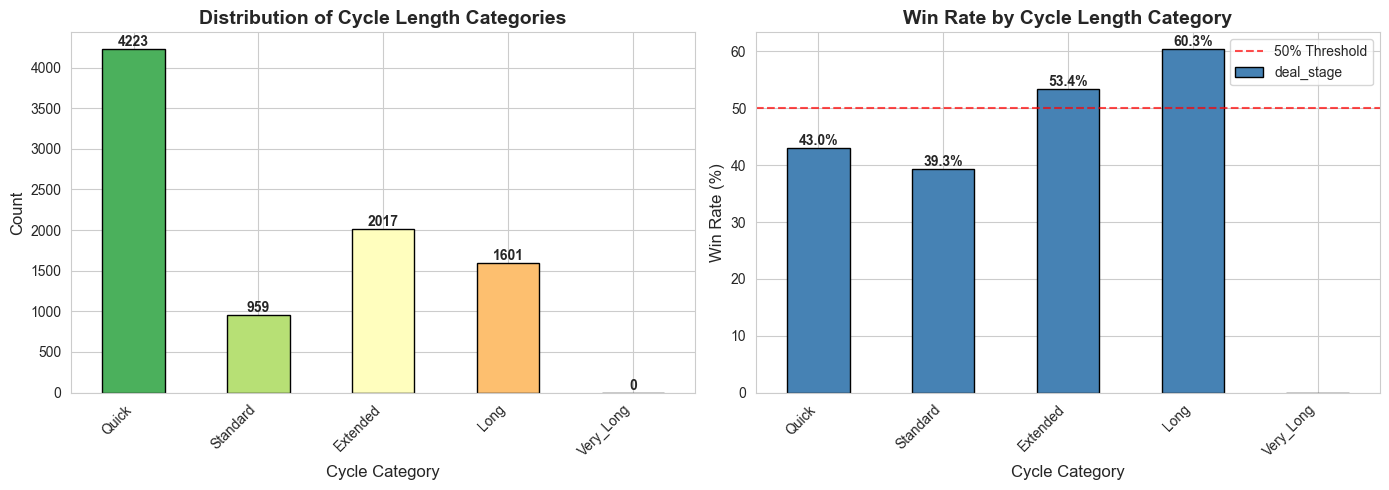


Key Finding:
  - Highest win rate: Long (60.3%)
  - Lowest win rate: Standard (39.3%)

FEATURE CREATED SUCCESSFULLY


In [54]:
# Feature 3: Cycle Length Categories
# Bin sales cycles into categories based on business rules

df['cycle_length_category'] = pd.cut(
    df['sales_cycle_days'],
    bins=[0, 30, 60, 90, 180, float('inf')],
    labels=['Quick', 'Standard', 'Extended', 'Long', 'Very_Long']
)

print("Sales Cycle Category Distribution:")
print("="*70)

category_df = pd.DataFrame({
    'Category': df['cycle_length_category'].value_counts().index,
    'Count': df['cycle_length_category'].value_counts().values,
    'Percentage': (df['cycle_length_category'].value_counts(normalize=True) * 100).values.round(2)
})
print(category_df.to_string(index=False))

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
category_counts = df['cycle_length_category'].value_counts().sort_index()
colors = sns.color_palette('RdYlGn_r', len(category_counts))
category_counts.plot(kind='bar', ax=ax1, color=colors, edgecolor='black')
ax1.set_title('Distribution of Cycle Length Categories', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cycle Category', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add value labels
for i, v in enumerate(category_counts.values):
    ax1.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Win rate by category
win_rate_by_category = df.groupby('cycle_length_category')['deal_stage'].apply(
    lambda x: (x == 'Won').mean() * 100
).sort_index()

win_rate_by_category.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Win Rate by Cycle Length Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cycle Category', fontsize=12)
ax2.set_ylabel('Win Rate (%)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% Threshold')
ax2.legend()

# Add value labels
for i, v in enumerate(win_rate_by_category.values):
    ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Finding:")
best_category = win_rate_by_category.idxmax()
worst_category = win_rate_by_category.idxmin()
print(f"  - Highest win rate: {best_category} ({win_rate_by_category.max():.1f}%)")
print(f"  - Lowest win rate: {worst_category} ({win_rate_by_category.min():.1f}%)")
print(f"\nFEATURE CREATED SUCCESSFULLY")

#### 5. Date Component Features (Seasonality)

#### Business Context:
In sales, the pattern often is time based like sales are urgently closed before a months end date, friday is usually when a deal closes due to weekly deadline, and companies rush to meet yearly target which means usually Q4 has the most close rate. 

#### Features to Create:
1. **`engage_month`**: Month of initial engagement (1-12)
2. **`engage_quarter`**: Business quarter (Q1-Q4)
3. **`engage_year`**: Year of engagement
4. **`engage_day_of_week`**: Day of week (0=Monday, 6=Sunday)
5. **`engage_week_of_year`**: ISO week number (1-52)
6. **`close_month`**, **`close_quarter`**, **`close_year`** 

#### Why These Features Matter:
These features capture trend in sales based on seasonality and identifies the best time to engage in prospecting.

In [55]:
# Extract date components from engage_date
print("Temporal Components from Engagement Date")
print("="*70)

df['engage_month'] = df['engage_date'].dt.month
df['engage_quarter'] = df['engage_date'].dt.quarter
df['engage_year'] = df['engage_date'].dt.year
df['engage_day_of_week'] = df['engage_date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['engage_week_of_year'] = df['engage_date'].dt.isocalendar().week

# Extract date components from close_date
df['close_month'] = df['close_date'].dt.month
df['close_quarter'] = df['close_date'].dt.quarter
df['close_year'] = df['close_date'].dt.year

print("Feature created successfully")
print(f"\nNew features created:")
temporal_features = [
    'engage_month', 'engage_quarter', 'engage_year', 'engage_day_of_week',
    'engage_week_of_year', 'close_month', 'close_quarter', 'close_year'
]
for i, feat in enumerate(temporal_features, 1):
    print(f"  {i}. {feat}")

Temporal Components from Engagement Date
Feature created successfully

New features created:
  1. engage_month
  2. engage_quarter
  3. engage_year
  4. engage_day_of_week
  5. engage_week_of_year
  6. close_month
  7. close_quarter
  8. close_year


Seasonal Pattern Analysis:


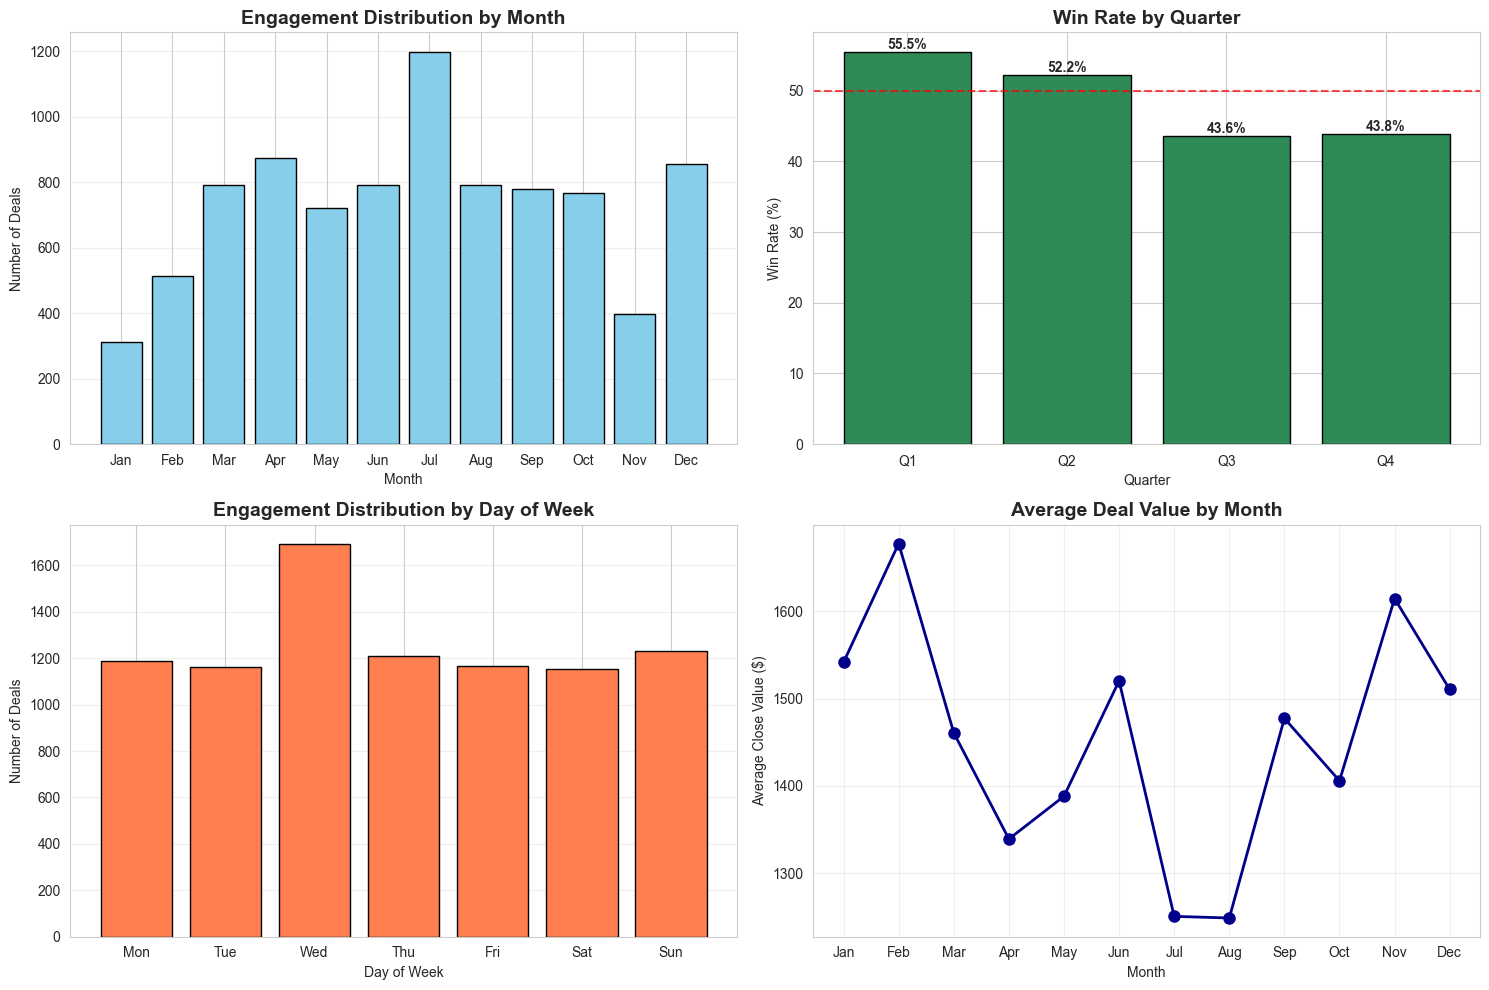


Seasonal Insights:
  - Best quarter for wins: Q1 (55.5% win rate)
  - Busiest engagement month: Jul (1198 deals)
  - Weekend engagements: 27.1% of total


In [56]:
# Analyze seasonal patterns
print("Seasonal Pattern Analysis:")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Deals by Month
month_counts = df['engage_month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 0].bar(month_names, month_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Engagement Distribution by Month', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Deals')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Win Rate by Quarter
quarter_win_rate = df.groupby('engage_quarter')['deal_stage'].apply(
    lambda x: (x == 'Won').mean() * 100
)
axes[0, 1].bar(['Q1', 'Q2', 'Q3', 'Q4'], quarter_win_rate.values, 
               color='seagreen', edgecolor='black')
axes[0, 1].set_title('Win Rate by Quarter', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Quarter')
axes[0, 1].set_ylabel('Win Rate (%)')
axes[0, 1].axhline(y=50, color='red', linestyle='--', alpha=0.7)
for i, v in enumerate(quarter_win_rate.values):
    axes[0, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Deals by Day of Week
dow_counts = df['engage_day_of_week'].value_counts().sort_index()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1, 0].bar(dow_names, dow_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_title('Engagement Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Deals')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Average Deal Value by Month
month_avg_value = df.groupby('engage_month')['close_value'].mean()
axes[1, 1].plot(month_names, month_avg_value.values, marker='o', 
                linewidth=2, markersize=8, color='darkblue')
axes[1, 1].set_title('Average Deal Value by Month', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Close Value ($)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Key insights
print("\nSeasonal Insights:")
best_quarter = quarter_win_rate.idxmax()
print(f"  - Best quarter for wins: Q{best_quarter} ({quarter_win_rate.max():.1f}% win rate)")

busiest_month = month_counts.idxmax()
print(f"  - Busiest engagement month: {month_names[busiest_month-1]} ({month_counts.max()} deals)")

weekend_deals = dow_counts.loc[5:].sum() if 5 in dow_counts.index or 6 in dow_counts.index else 0
weekend_pct = (weekend_deals / dow_counts.sum()) * 100
print(f"  - Weekend engagements: {weekend_pct:.1f}% of total")

#### Summary of Temporal Features
A total of 10 features were created based on time based properties. The following are the features:

1. **sales_cycle_days** - Calendar days from engagement to deal close
2. **business_days_in_cycle** - Working days only (excludes weekends)
3. **cycle_length_category** - Binned categories (Quick to Very_Long)
4. **engage_month** - Month of engagement (1-12)
5. **engage_quarter** - Business quarter (1-4)
6. **engage_year** - Year of engagement
7. **engage_day_of_week** - Day of week (0-6)
8. **engage_week_of_year** - ISO week number (1-52)
9. **close_month** - Month of deal closure
10. **close_quarter** - Quarter of deal closure
